# Mundo de laberinto

Definimos un problema que consiste en simular el recorrido de un agente que hace desde un punto inicial en un mapa laberinto, donde se puede encontrar con obstáculos que obstruyan su camino. El objetivo del agente es llegar a una meta marcada dentro del mapa.

Para simular este problema, se contará con la siguiente información:

1. Mapa del laberinto (board): define la estructura del ambiente, indicando donde están los obstáculos (se marcan con '#', y indica dónde está la meta ('x') y dónde se encuentra el agente ('o').
2. Meta (goal): indica dónde está la meta ('x') en términos de coordenadas del mapa [x,y].

La simulación del problema, además cuenta con las siguientes funciones:

1. actions: dado un estado, regresa las acciones legales, que corresponden a los movimientos que puede realizar el agente sin toparse con un obstáculo.
2. result: dado un estado y una acción, regresa el estado resultante de ejecutar la acción en el estado dado.
3. move: realiza el movimiento en la simulación; es decir, desplaza el agente de su estado previo a un nuevo estado.
4. draw: Dibuja el mapa en formato de imagen.
5. is_goal: revisa si el estado es meta o no. Puede haber más de una meta.

In [1]:
class Maze(object):
    """Simulador de laberinto"""
    def __init__(self, board):
        #Define el laberinto
        self.board = [list(x) for x in board.split("\n") if x]
        #Guardo el estado inicial
        self.goal = None
        
        for y in range(len(self.board)):
            for x in range(len(self.board[y])):
                if self.board[y][x] == 'o':
                    #El inicial es el estado con el símbolo 'o'
                    self.initial = (x,y)
                elif self.board[y][x] == 'x':
                    #La meta es el estado con el símbolo 'x'
                    self.goal = (x,y)
                    
    def __str__(self):
        return '\n'.join([''.join(symbols) for symbols in self.board])
        
    def actions(self, state):
        """Define las posibles acciones permitidas en cada estado"""
        actions = []
        for action in ["up","down","left","right"]:
            newx, newy = self.result(state, action)
            #Una acción no permitida es aquella donde se
            #topa con un símbolo # que indica pared
            if self.board[newy][newx] != "#":
                actions.append(action)
        return actions
    
    def result(self, state, action):
        """Calcula el estado resultante de la acción"""
        #Determina el estado actual
        x, y = state
        #Genera el resultado de las acciones
        if action.count("up"):
            y -= 1
        if action.count("down"):
            y += 1
        if action.count("left"):
            x -= 1
        if action.count("right"):
            x += 1

        new_state = (x, y)
        return new_state
    
    def move(self, state, new_state, symbol='o'):
        """Cambia la posición del agente de un estado a otro"""
        #Estado anterior y posterior
        x,y = state
        new_x, new_y = new_state
        if self.board[new_y][new_x] == ' ':
            #Mueve al agente al mismo estado
            self.board[y][x] = ' '
            self.board[new_y][new_x] = symbol
        else:
            pass
        
    def draw(self):
        """Dibuja el mapa"""
        import matplotlib.pyplot as plt
        import numpy as np
        #Crea imagen
        img = np.ones((len(self.board), len(self.board[0]), 4))
        for i, row in enumerate(self.board):
            for j, element in enumerate(row):
                #Colorea al agente de azul, la meta de verde y los 
                #obstáculos de negro
                if element == '#':
                    img[i,j] = np.array([0,0,0,1])
                elif element == 'o':
                    img[i,j] = np.array([0.2,0.5,0.8,1])
                elif element == 'x':
                    img[i,j] = np.array([0.2,0.9,0.5,1])

        plt.imshow(img)
        plt.show()
    
    def is_goal(self, state):
        """Determina si un estado es meta"""
        return state == self.goal

Ahora podemos ver cómo se comporta esta simulación de un laberinto. Para esto, necesitamos primero dibujar un mapa, que será una cadena una malla donde las entradas serán cadenas de texto: 1) 'o' representa al agente; 2) 'x' representa la meta; 3) ' ' representa espacio donde puede moverse el agente; y 4) '#' representa obstáculos que impiden la movilidad del agente. El mapa tendrá coordenadas que consisten en un plano, por lo que marcamos estas coordenadas como [x,y], tal que x representa las posiciones en el eje horizontal mientras $y$ en el vertical.

In [2]:
mapa = """
##############################
# o         #              # #
######  #   ##########  #  # #
#       #   ##          #    #
#  #           #   #####     x
##############################
"""

Ya con el mapa definido, podemos entonces pasarlo a la clase que hemos programado para que construya la simulación y podamos actuar sobre este mapa. Podemos, por ejemplo, identificar las coordenadas del estado inicial, así como las coordenadas del estado final.

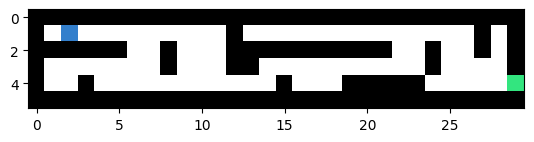

Coordenadas inicial: (2, 1)
Coordenadas meta: (29, 4)


In [3]:
maze = Maze(mapa)
maze.draw()
print('Coordenadas inicial: {}\nCoordenadas meta: {}'.format(maze.initial, maze.goal))

Podemos entonces ver el resultado de sus acciones y mover al agente a través del laberinto:

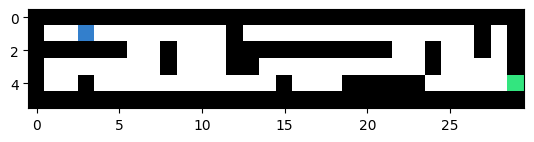

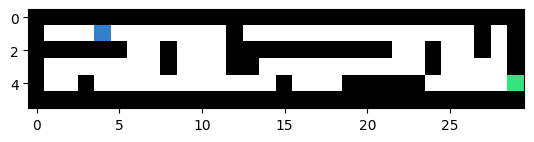

In [4]:
new_state = maze.result(maze.initial, "right")
maze.move(maze.initial, new_state)
maze.draw()
maze.move(new_state, maze.result(new_state, "right") )
maze.draw()

### Referencias
La construcción de este problema puede consultarse en: 
* Joshi, P. (2017). "Building a maze solver", en <i>Artificial Intelligence with Python</i>. Packt Publishing, pp. 191-196.